# Inference Runs on SAR Image Datasets
* Initially have 4k images from 10 Geophysical Phenomenon dataset paper that were classified as slick.
* Manually classified into E/NE classes.
* Run inference using fine-tuned weights we created from our own eddy datasets comprising around 30k images from Med and Cali. Fine-tuning done on pre-trained weights from SimCLR and MoCo trained on approx 100k random SAR eddy tiles. 

In [1]:
import os
import sys

from pathlib import Path
import datetime
import pprint

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [2]:
%matplotlib inline

In [3]:
# Functions and Lambdas
create_series = lambda fp : pd.read_csv(Path(fp), names=['res']).squeeze("columns")

def generate_binary_cls_report(y_true, y_pred, cls_label=1):
    """Generate report overviewing performance of binary classification task
    
    """

    cf = confusion_matrix(y_true, y_pred) 
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall_0 = recall_score(y_true, y_pred, pos_label=0)
    recall_1 = recall_score(y_true, y_pred, pos_label=1)

    pprint.pprint(f"Accuracy: {accuracy: .2%}")
    pprint.pprint(f"Precision: {precision: .2%}")
    pprint.pprint(f"Class 0 recall: {recall_0: .2%}")
    pprint.pprint(f"Class 1 recall: {recall_1: .2%}")

    # Plot Confusion Matrix
    plt.figure(figsize=(4, 3), dpi=100)
    ax = sns.heatmap(cf, annot=True, fmt='d', cmap="Blues")
    ax.set_xlabel("Predicted", fontsize=10, labelpad=10)
    ax.set_ylabel("Actual", fontsize=10, labelpad=10)
    plt.show()

    plt.figure(figsize=(4, 3), dpi=100)
    ax_prop = sns.heatmap(cf / cf.sum(axis=1)[:, np.newaxis], annot=True, fmt='.2%', cmap="Blues")
    ax_prop.set_xlabel("Predicted", fontsize=10, labelpad=10)
    ax_prop.set_ylabel("Actual", fontsize=10, labelpad=10)
    plt.show()
    

In [4]:
# Results
res_simclr_val_med = create_series('datasets/preds_4k_slicks_ft_simclr_med_test_med_072377_01-03-24.out')
res_simclr_val_cal = create_series('datasets/preds_4k_slicks_ft_simrlr_med_test_cali_004244_01-03-24.out')
res_moco_val_med = create_series('datasets/preds_4k_slicks_ft_moco_med_test_med_185136_01-03-24.out')
res_moco_val_cal = create_series('datasets/preds_4k_slicks_ft_moco_med_test_cali_190008_01-03-24.out')

# Labels, Ben labeled 4k E/NE from slick (J) dataset
df_slicks = pd.read_csv('datasets/10gpp_slicks_labeled_ben.csv')

df_slicks.head()

,img,label
0,GeoTIFF/J/s1a-wv2-slc-vv-20160612t162736-20160...,0
1,GeoTIFF/J/s1a-wv2-slc-vv-20160612t181008-20160...,0
2,GeoTIFF/J/s1a-wv2-slc-vv-20160612t185823-20160...,0
3,GeoTIFF/J/s1a-wv2-slc-vv-20160612t205509-20160...,0
4,GeoTIFF/J/s1a-wv2-slc-vv-20160613t064234-20160...,0


In [5]:
cf_simclr_val_med = confusion_matrix(df_slicks.label, res_simclr_val_med)
cf_simclr_val_cal = confusion_matrix(df_slicks.label, res_simclr_val_cal)
cf_moco_val_med = confusion_matrix(df_slicks.label, res_moco_val_med)
cf_moco_val_cal = confusion_matrix(df_slicks.label, res_moco_val_cal)

## SimCLR Pretained 100k, FT ~30k Med Labeled
* Better recall, but poor precision

### Med Validation

'Accuracy:  86.46%'
'Precision:  10.56%'
'Class 0 recall:  89.25%'
'Class 1 recall:  27.01%'


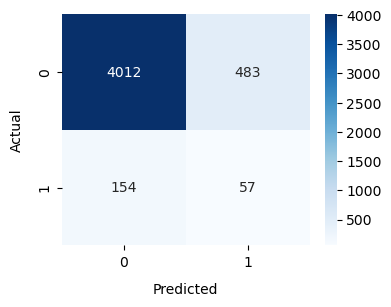

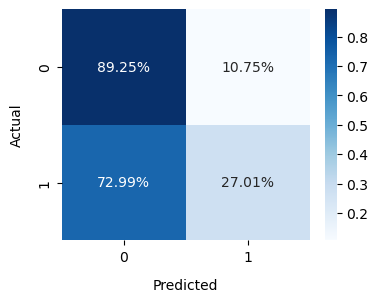

In [7]:
## SimCLR w/ Med Validation
generate_binary_cls_report(df_slicks.label, res_simclr_val_med)

### Cali Validation

'Accuracy:  87.38%'
'Precision:  8.99%'
'Class 0 recall:  90.55%'
'Class 1 recall:  19.91%'


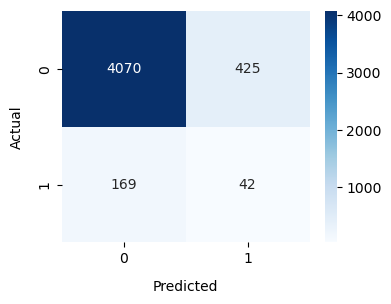

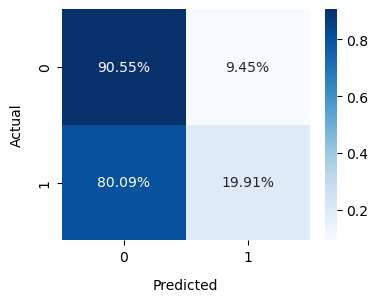

In [8]:
generate_binary_cls_report(df_slicks.label, res_simclr_val_cal)

## MoCo Pretained 100k, FT ~30k Med Labeled
* Improved Precision, not great recall

In [9]:
generate_binary_cls_report(df_slicks.label, res_moco_val_med)asdfasdf

SyntaxError: invalid syntax (1853009051.py, line 1)

'Accuracy:  93.20%'
'Precision:  17.37%'
'Class 0 recall:  96.93%'
'Class 1 recall:  13.74%'


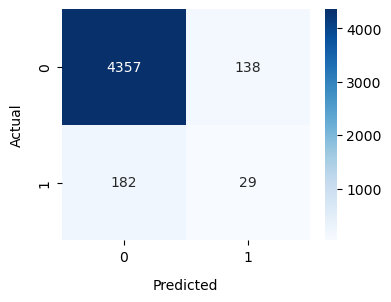

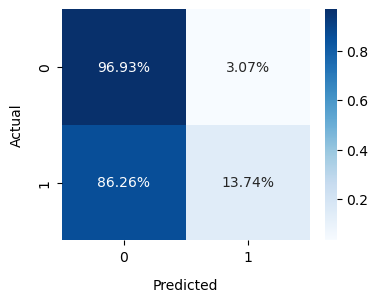

In [10]:
generate_binary_cls_report(df_slicks.label, res_moco_val_cal)